In [127]:
import pandas as pd
import matplotlib.pyplot as plt

In [128]:
isign = pd.read_csv("isign_revised.csv")
isign.head()

,uid,text,data_part
0,nLG-B3e-pP0--48,"See, to remove impurities or harmful components.",Train
1,OS0q5XwHSys--18,It says sexual act performed by a man on his o...,Train
2,s9bWguOVijc--23,"Therefore, it wants the government officers to...",Train
3,xAZMH5dLB4k--16,He has to appear before the court & come for q...,Test
4,u8XxXbHuYPM--9,The TADA court then sent him to jail. He remai...,Train


<h2> <font color = 'orange'> Find NAN rows </font></h3>

In [129]:
nan_rows = isign[~isign['text'].apply(lambda x: isinstance(x, str))]

nan_train = nan_rows[nan_rows['data_part']=='Train']
nan_val = nan_rows[nan_rows['data_part']=='Validation']
nan_test = nan_rows[nan_rows['data_part']=='Test']

print("No. of NAN texts in Training =",len(nan_train))
print("No. of NAN texts in Validation =",len(nan_val))
print("No. of NAN texts in Testing =",len(nan_test))

No. of NAN texts in Training = 0
No. of NAN texts in Validation = 0
No. of NAN texts in Testing = 0


<h2> <font color = 'orange'> Distribution of words </font></h3>

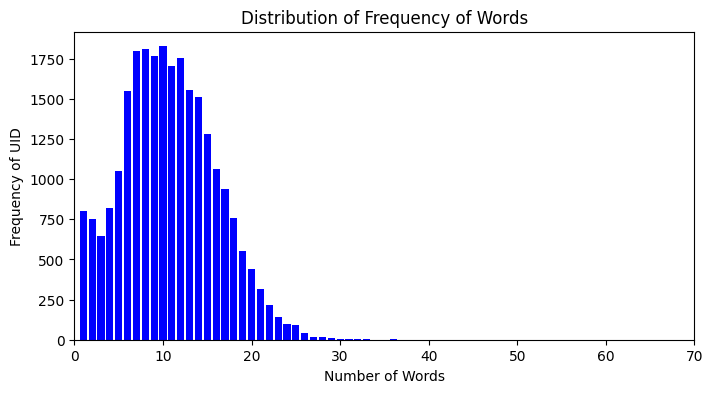

In [140]:
isign['word_count'] = isign['text'].apply(lambda x: len(str(x).split()))

# Get the frequency distribution of word counts
word_count_freq = isign['word_count'].value_counts().sort_index()

plt.figure(figsize=(8, 4))
plt.bar(word_count_freq.index, word_count_freq.values, color='blue')
plt.xlabel('Number of Words')
plt.ylabel('Frequency of UID')
plt.title('Distribution of Frequency of Words')
plt.xlim(0,70)

plt.show()

In [131]:
print(word_count_freq[0:10])

word_count
1      800
2      751
3      645
4      820
5     1052
6     1549
7     1797
8     1811
9     1766
10    1828
Name: count, dtype: int64


### Find the most frequent length among sentences and which are those sentences

In [132]:
max_value = word_count_freq.max()
max_indices = word_count_freq[word_count_freq == max_value].index.tolist()

print("Most frequent length of a sentence:",max_indices)
print("No. of sentences of above length:",max_value)

print("\nSome sentences are:")

examples=[]
for index, row in isign.iterrows():
    if int(row['word_count']) == max_indices[0]:
        examples.append([row['uid'], row['text']])
examples = pd.DataFrame(examples, columns=['uid', 'text'])
print("\n",examples.iloc[:,1][0],"\n",examples.iloc[:,1][1],"\n",examples.iloc[:,1][2])


Most frequent length of a sentence: [10]
No. of sentences of above length: 1828

Some sentences are:

 A surfer Maya Gabeira from Brazil has achieved the unthinkable. 
 They will talks about strenghtening business, military & technology ties. 
 It is unimaginable. Let me tell you this strange story.


### Find the highest length sentence

In [133]:
print("highest length among all sentences is:", word_count_freq[-1:-2:-1].index[0])
print("No. of sentences with this length:", word_count_freq.iloc[-1])
print("\nThe sentence is")


for index, row in isign.iterrows():
    if int(row['word_count']) == word_count_freq[-1:-2:-1].index[0]:
        print(row['text'])

highest length among all sentences is: 66
No. of sentences with this length: 1

The sentence is
title 5 fiber fabric from page 18 to 25 from page 18 to 25 page 18 fiber to fabric Pahili and Bojo, one fiber fabric science quiz, Pahili and Bojo at one of the first prize in a science quiz competition held at their school. They were very excited and excited to use the fiber to use the prize money to buy clothes for their parents.


### Find the lowest length sentence

In [134]:
print("lowest length among all sentences is:", word_count_freq[0:1].index[0])
print("No. of sentences with this length:", word_count_freq.iloc[0])
print("\nSome of the sentence are")

_ = 0
for index, row in isign.iterrows():
    if int(row['word_count']) == word_count_freq[0:1].index[0]:
        if _ <= 5:
            print(row['text'])
            _ += 1

lowest length among all sentences is: 1
No. of sentences with this length: 800

Some of the sentence are
dissipate
apart
book
one
A
One.


<h2> <font color = 'orange'> more visualizations on different subsets of data </font></h3>

In [135]:
# For Training, Validation, Test seperately

isign_trn = isign[isign['data_part']=='Train']
isign_val = isign[isign['data_part']=='Validation']
isign_tst = isign[isign['data_part']=='Test']
len(isign_trn),len(isign_val),len(isign_tst)


(20295, 2537, 2537)

### Distribution of data for different subsets

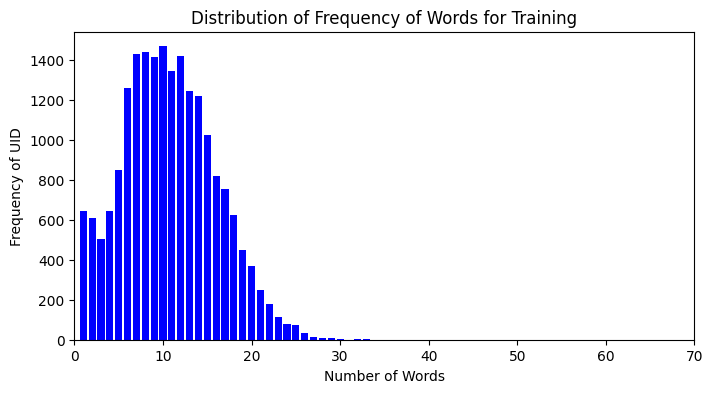

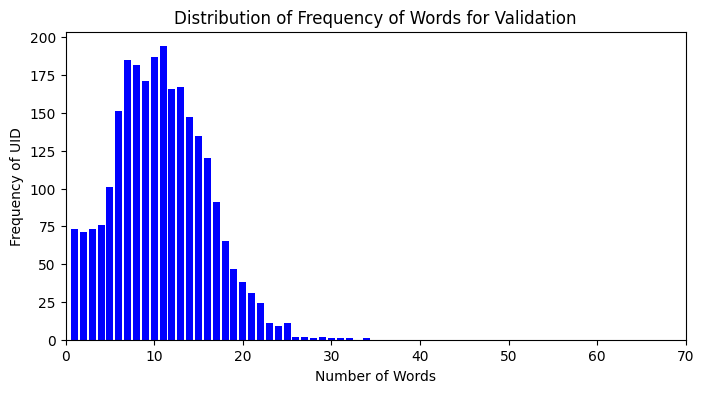

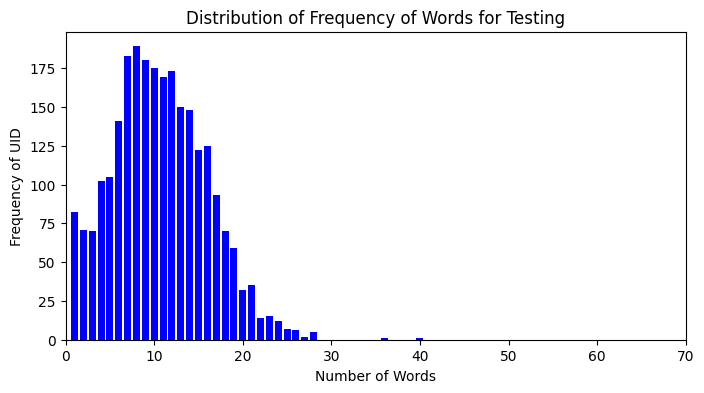

In [138]:
def distibution_of_data_part(data,data_part):

    # Get the frequency distribution of word counts
    word_count_freq = data['word_count'].value_counts().sort_index()

    plt.figure(figsize=(8, 4))
    plt.bar(word_count_freq.index, word_count_freq.values, color='blue')
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency of UID')
    plt.title(f'Distribution of Frequency of Words for {data_part}')
    plt.xlim(0,70)
    plt.show()

distibution_of_data_part(isign_trn,"Training")
distibution_of_data_part(isign_val,"Validation")
distibution_of_data_part(isign_tst,"Testing")

### most frequent length among sentences and which are those sentences
### longest sentence
### shortest sentence

In [137]:
def data_insights(data,data_part):
    word_count_freq = data['word_count'].value_counts().sort_index()
    max_value = word_count_freq.max()
    max_indices = word_count_freq[word_count_freq == max_value].index.tolist()
    
    print(f'--------------{data_part} Data----------------\n')
    
    #   Most frequent length of sentences
    print("Most frequent length of a sentence:",max_indices)
    print("No. of sentences of above length:",max_value)

    print("\nSome sentences are:")
    examples=[]
    for index, row in data.iterrows():
        if int(row['word_count']) == max_indices[0]:
            examples.append([row['uid'], row['text']])
    examples = pd.DataFrame(examples, columns=['uid', 'text'])
    print(" ",examples.iloc[:,1][0],"\n",examples.iloc[:,1][1],"\n",examples.iloc[:,1][2])
    
    #   Longest sentence
    print("\n\nhighest length among all sentences is:", word_count_freq[-1:-2:-1].index[0])
    print("No. of sentences with this length:", word_count_freq.iloc[-1])
    print("\nThe sentence is")
    for index, row in data.iterrows():
        if int(row['word_count']) == word_count_freq[-1:-2:-1].index[0]:
            print(row['text'])

    #   Shortest sentence
    print("\n\nlowest length among all sentences is:", word_count_freq[0:1].index[0])
    print("No. of sentences with this length:", word_count_freq.iloc[0])
    print("\nSome of the sentence are")
    _ = 0
    for index, row in data.iterrows():
        if int(row['word_count']) == word_count_freq[0:1].index[0]:
            if _ <= 5:
                print(row['text'])
                _ += 1

    print("\n","-"*50)    

data_insights(isign_trn,"Training")
data_insights(isign_val,"Validation")
data_insights(isign_tst,"Testing")

--------------Training Data----------------

Most frequent length of a sentence: [10]
No. of sentences of above length: 1466

Some sentences are:
  A surfer Maya Gabeira from Brazil has achieved the unthinkable. 
 They will talks about strenghtening business, military & technology ties. 
 It is unimaginable. Let me tell you this strange story.


highest length among all sentences is: 66
No. of sentences with this length: 1

The sentence is
title 5 fiber fabric from page 18 to 25 from page 18 to 25 page 18 fiber to fabric Pahili and Bojo, one fiber fabric science quiz, Pahili and Bojo at one of the first prize in a science quiz competition held at their school. They were very excited and excited to use the fiber to use the prize money to buy clothes for their parents.


lowest length among all sentences is: 1
No. of sentences with this length: 645

Some of the sentence are
dissipate
apart
book
one
A
One.

 --------------------------------------------------
--------------Validation Data-